<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/Copy_of_dspt_phase_2_3_Linear_regression_ipynb_Janet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

**Overview of lecture**

1. Linear regression  
  a. How it works

  b. Assumptions of Linear regression

  c. How to evaluate linear regression models

2. Polynomial regression

3. Code example

## How linear regression works

> Linear regression: $$y= mx + c$$

establishes the relationship between a dependent variable (also known as the target variable) and one or more independent variables (also known as the predictor variables)

> Multivariate or Multiple Linear regression: $$y = m_1x_1 + m_2x_2 + \ldots + m_nx_n + c$$

In multiple linear regression, we have more than one independent variable.


## Assumptions of linear regression

1. The dependent variable Y should be numeric
2. The mean of residuals is (close to) zero
3. Homoscedasticity of residuals or equal variance
4. The X variables and residuals are uncorrelated
5. The number of observations must be greater
than number of Xs
6. No perfect multicollinearity i.e no perfect linear relationship between variables.
7. Normality of residuals

These can be summarized as: Linearity, Independence, Homoscedasticity, Normality.

## How to evaluate regression models



> MSE & RMSE

RMSE: $\sqrt{\frac{1}{N} \sum_{i=1}^N(y_i - \hat{y}_i)^2}$

> MAE: 

$\frac{1}{N} \sum_{i=1}^N|y_i - \hat{y}_i|$

> R squared & Adjusted R squared

$R^2$ called the coefficient of determination and is a measure of the variation in y explained by the variation in x

$R^2 = 1 -\frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2}$

$R^2_{adj} = 1 -\frac{(1-R^2)(n-1)}{n-k-1}$

> Residual plots

Residual plots can be used to visually assess the goodness of fit of the regression model. The plot shows the difference between the predicted and actual values of the response variable (i.e., the residuals) against the predictor variable(s). Ideally, the residuals should be randomly scattered around zero, with no obvious patterns or trends.



# Polynomial regression

> How does it work?

$$y = m_1x_1 + m_2x_2^2 + \ldots + m_nx_n^k + c$$

It is a type of regression analysis in which the relationship between the independent variable (or predictor) and the dependent variable (or response) is modeled as an nth degree polynomial function.

NOTE: As the degree of the polynomial increases, the model can become **overfit** and lose its ability to generalize well to new data. Therefore, it is important to carefully select the degree of the polynomial that best fits the data.

# Let's look at an example:

In [ ]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['seagreen','blue', 'darkorange', 'indigo', 'yellow', 'purple', 'violet', 'turquoise']

(20, 1) (20,)


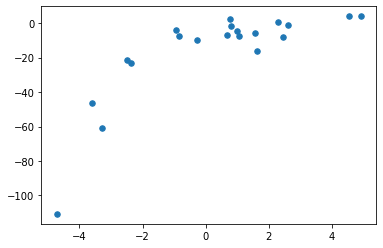

In [ ]:
#Generate data
np.random.seed(0)
N = 20
x_orig = 2 - 3 * np.random.normal(0, 1, N)
y_orig = x_orig - 2 * (x_orig ** 2) + 0.5 * (x_orig ** 3) + np.random.normal(-5, 5, N) 

# transforming the data to include another axis
x = x_orig.reshape((20, 1))
y = y_orig.reshape((20, 1))
print(x.shape, x_orig.shape)
plt.scatter(x,y, s=30)
plt.show()

* Take a look at the scikit-learn user guide for more details on [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
#linear regression model to this dataset.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

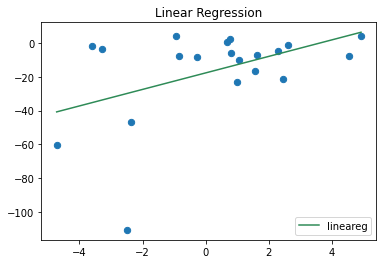

rmse: 23.86674434134634
r2  : 0.21435775146361546


In [ ]:
# instantiate the Linear model
model = LinearRegression()

# Use the method fit to train the model with input data x and output y
model.fit(x, y)

# Use the trained model to predict output y_pred from input x
y_pred = model.predict(x)

# plot the model
plt.scatter(x, y, s=40)
plt.title('Linear Regression')
plt.plot(x, y_pred, color=colors[0],label='lineareg')
plt.legend(loc="lower right")
plt.show()

# Performance metrics
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('rmse:',rmse)
print('r2  :', r2)

In [ ]:
model.coef_

array([[4.88783788]])

In [ ]:
model.intercept_

array([-17.69083433])

**Conclusion**: You can observe that the straight line is unable to capture the patterns in the data. This is an example of **under-fitting**.

To overcome under-fitting, we need to **increase the complexity of the model**.  
**Idea**: convert the original features into their higher order terms we will use the **PolynomialFeatures** class provided by **scikit-learn**. Next, we train the model using Linear Regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import operator

instance:0: poly_degree: 1
rmse = 23.86674434134634
r2 = 0.21435775146361546
instance:1: poly_degree: 4
rmse = 23.351949785883676
r2 = 0.24788411000233368
instance:2: poly_degree: 10
rmse = 12.268954915107912
r2 = 0.7923874469709541


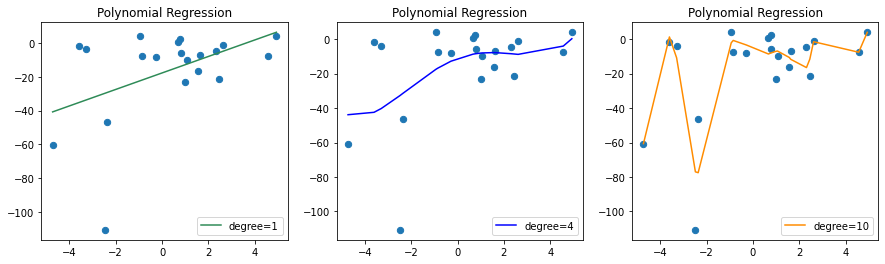

poly_features
without poly_features: [-4.7226796]
adding  poly_features: [ 1.00000000e+00 -4.72267960e+00  2.23037026e+01 -1.05333241e+02
  4.97455149e+02 -2.34932128e+03  1.10950917e+04 -5.23985631e+04
  2.47461625e+05 -1.16868197e+06  5.51931049e+06]


In [ ]:
model = LinearRegression()

plt.figure(figsize=(15,4))
# Create Polynomial features with degree 1, then 4 then, 10 (from original input x => (x^0, x^1, ...x^degree) 
for i,degree in enumerate([1,4,10]):
    print('instance:{}: poly_degree: {}'.format(i,degree))
    # Create an instance of class PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree)

    # Use fit_transform method of class PolynomialFeatures to create new features vector x_poly
    x_poly = polynomial_features.fit_transform(x)

    # Train the model using the polynomial features vector x_poly and output y
    model.fit(x_poly, y)

    # Use the trained model to predict output from vector x_poly
    y_poly_pred = model.predict(x_poly)
    #print(x, x_poly)

    # Performance
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('rmse =',rmse)
    print('r2 =',r2)
    # plot
    plt.subplot(1,3,1+i)
    plt.scatter(x, y, s=40)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color=colors[i], label='degree='+str(degree))
    plt.title('Polynomial Regression')
    plt.legend(loc="lower right")
plt.show()

print('poly_features')
print('without poly_features:', x[0])
print('adding  poly_features:', x_poly[0])

**Conclusion**: You can observe that with Polynomial Regression (adding polynomial features), we increase the complexity of the model to capture the patterns in the data. Unfortunately, increasing the degree will lead to **over-fitting**.

## Implement your own linear regression

The Delivery Time Data
A soft drink bottler is analyzing the vending machine service routes in his distribution system. He
is interested in predicting the amount of time required by the route driver to service the vending
machines in an outlet. This service activity includes stocking the machine with beverage products
and minor maintenance or housekeeping. The industrial engineer responsible for the study has
suggested that the two most important variables affecting the delivery time (y) are the number of
cases of product stocked (x1), and the distance walked by the route driver (x2). The engineer has
collected 25 observations on delivery time. Fit a regression model on this data

In [ ]:
y = [16.68,11.50,12.03,14.88,13.75,
18.11,8.00,17.83,79.24,21.50,
40.33,21.00,13.50,19.75,24.00,
29.00,15.35,19.00,9.50,35.10,
17.90,52.32,18.75,19.83,10.75] # Delivery Time(Minutes)

x1 = [7,3,3,4,6,
7,2,7,30,5,
16,10,4,6,9,
10,6,7,3,17,
10,26,9,8,4] # Number of cases

x2 = [560,220,340,80,150,
330,110,210,1460,605,
688,215,255,462,448,
776,200,132,36,770,
140,810,450,635,150] # Distance (Feet)